# 911 Calls Capstone Project 

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [248]:
df = pd.read_csv('911.csv')

## Checking out the head of dataset

In [249]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### As the column e just contain dummy variable 1 so we can delete it

In [250]:
df.drop('e',axis=1,inplace = True)

In [251]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


### Checking out the missing values through heat map

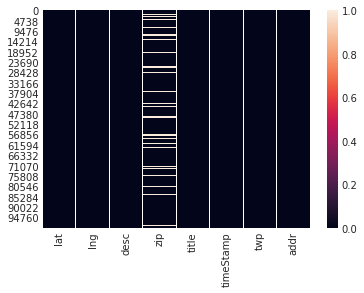

In [252]:
sns.heatmap(df.isnull())

As we can see that there as a lot of missing zip codes
#### But we can fill the using latitude and longitude so lets do it

### filling missing values

In [254]:
temp_df = df[df['zip'].isnull() == False ] 

In [255]:
X_train = temp_df[['lat','lng']][:86000]
X_test = temp_df[['lat','lng']][86000:]
y_train = temp_df['zip'][:86000]
y_test = temp_df['zip'][86000:]

#### Using Decition tree model for predicting zip codes 

In [256]:


from sklearn.tree import DecisionTreeClassifier

In [258]:
model = DecisionTreeClassifier(criterion='entropy')

In [259]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [260]:
y_pred = model.predict(X_test)

In [261]:
from sklearn.metrics import classification_report

In [262]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

    18041.0       1.00      1.00      1.00         6
    18054.0       1.00      1.00      1.00         2
    18070.0       1.00      1.00      1.00         1
    18074.0       1.00      1.00      1.00         8
    18076.0       1.00      1.00      1.00         1
    18092.0       1.00      1.00      1.00         2
    18936.0       1.00      1.00      1.00         3
    18960.0       1.00      1.00      1.00         1
    18964.0       1.00      1.00      1.00         9
    18969.0       1.00      1.00      1.00         3
    18974.0       1.00      1.00      1.00         1
    18976.0       1.00      1.00      1.00         1
    19001.0       1.00      1.00      1.00        14
    19002.0       1.00      1.00      1.00        24
    19003.0       1.00      1.00      1.00        10
    19004.0       1.00      0.86      0.92         7
    19006.0       1.00      1.00      1.00        14
    19009.0       1.00      1.00      1.00   

/home/nitin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### seems perfect

#### As model accuracy is 100% and it will be because by using latitude and longitude we perfectly can predict zip

##### filling missing values now

In [264]:


# df[['lat','lng','zip']].apply(fun)
def predict_zip(df):
    x=df['lat']
    y=df['lng']
    return model.predict([[x,y]])

In [266]:
zip_code = df[['lat','lng']].apply(predict_zip,axis=1)

In [267]:
zip_old = df['zip']

In [268]:
df['zip'] = zip_code['lat']

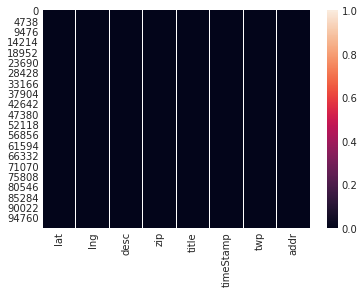

In [269]:
sns.heatmap(df.isnull())

#### filling address 

In [271]:
df['addr'] = df['desc'].apply(lambda x : x.split(';')[0])

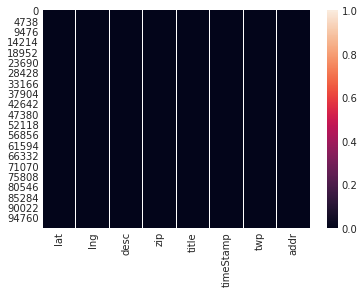

In [272]:
sns.heatmap((df.isnull()))

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 8 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          99492 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         99492 non-null object
dtypes: float64(3), object(5)
memory usage: 6.1+ MB


In [274]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [275]:
df.drop('desc',axis=1,inplace = True)

In [276]:
df.head()

,lat,lng,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,19464.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [277]:
df['Emergency_type'] = df['title'].apply(lambda x : x.split(':')[0])

In [278]:
df.head()

,lat,lng,zip,title,timeStamp,twp,addr,Emergency_type
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,19464.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


#### Lets analyse data

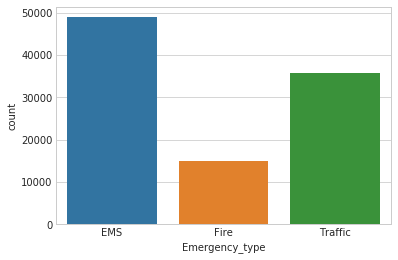

In [279]:
sns.countplot(x='Emergency_type',data = df)

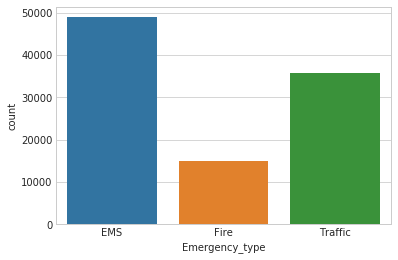

In [280]:
sns.countplot(x='Emergency_type',data = df)

#### formatting time stamp

In [282]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [283]:
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Dayofweek']=df['timeStamp'].apply(lambda x: x.dayofweek)
ex = df['timeStamp'][0]

In [328]:
df['Date']=df['timeStamp'].apply(lambda x: x.date().day)

In [329]:
df['Year']=df['timeStamp'].apply(lambda x: x.year)

In [284]:
d = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [285]:
df['weekday'] = df['Dayofweek'].apply(lambda x : d[x])

In [330]:
df.head()

,lat,lng,zip,title,timeStamp,twp,addr,Emergency_type,Hour,Month,Dayofweek,weekday,Date,Year
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3,Thu,10,2015
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3,Thu,10,2015
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,3,Thu,10,2015
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,3,Thu,10,2015
4,40.251492,-75.603350,19464.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,3,Thu,10,2015


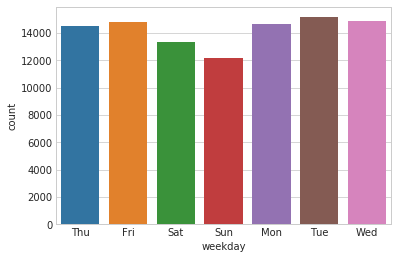

In [287]:
sns.countplot(data=df,x='weekday')

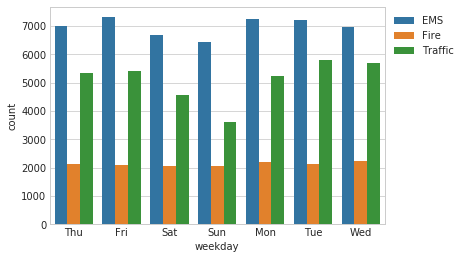

In [288]:
sns.countplot(data=df,x='weekday',hue='Emergency_type')
plt.legend(loc =2,bbox_to_anchor=(1,1))

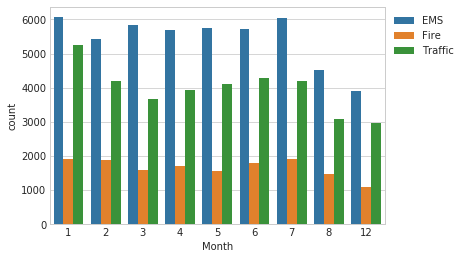

In [289]:
sns.countplot(data = df,x='Month',hue = 'Emergency_type')
plt.legend(loc=2,bbox_to_anchor=(1,1))

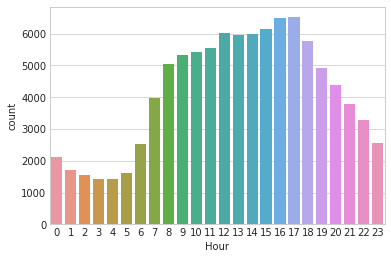

In [290]:
sns.countplot(data = df,x='Hour')

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

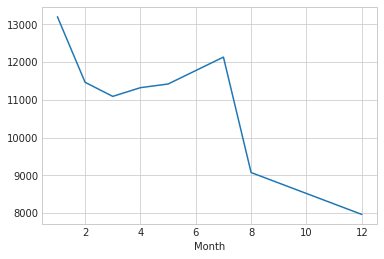

In [291]:
bymonth = df.groupby(by='Month').count()
bymonth['twp']
bymonth['twp'].plot()

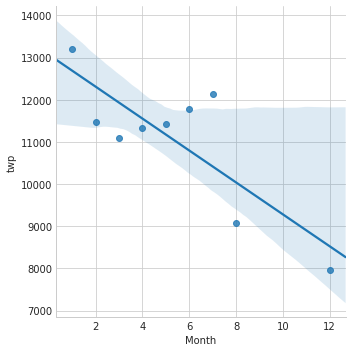

In [292]:
sns.set_style('whitegrid')
ax= sns.lmplot(data = bymonth.reset_index(),x='Month',y='twp')

In [293]:
filtered_data = df.groupby(by=['weekday','Hour']).count()['Emergency_type'].unstack()
filtered_data_by_month = df.groupby(by=['weekday','Month']).count()['Emergency_type'].unstack()
filtered_data_by_Emergency = df.groupby(by=['Emergency_type','Month']).count()['weekday'].unstack()

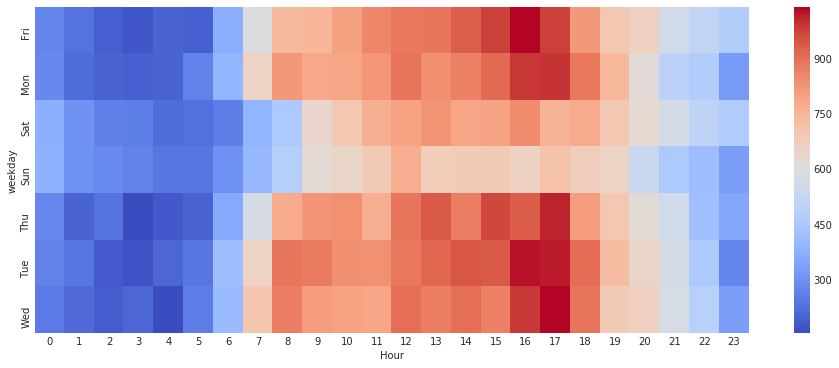

In [294]:
plt.figure(figsize=(16,6))
sns.heatmap(data = filtered_data,cmap='coolwarm')

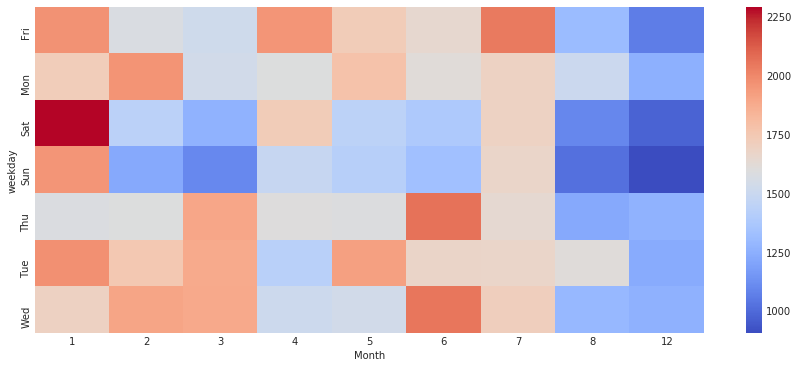

In [295]:
plt.figure(figsize=(15,6))
sns.heatmap(data = filtered_data_by_month,cmap='coolwarm')

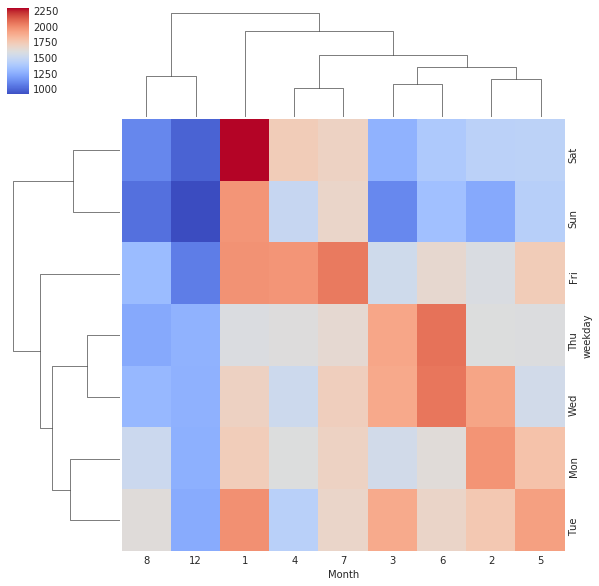

In [296]:
sns.clustermap(filtered_data_by_month,cmap='coolwarm')

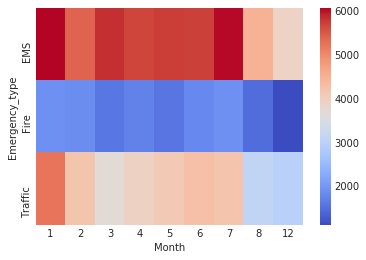

In [297]:
sns.heatmap(data = filtered_data_by_Emergency,cmap='coolwarm')

In [332]:
filtered_data_by_day = df[df['Month']==1].groupby(['Date','Emergency_type','Year']).count()['twp']

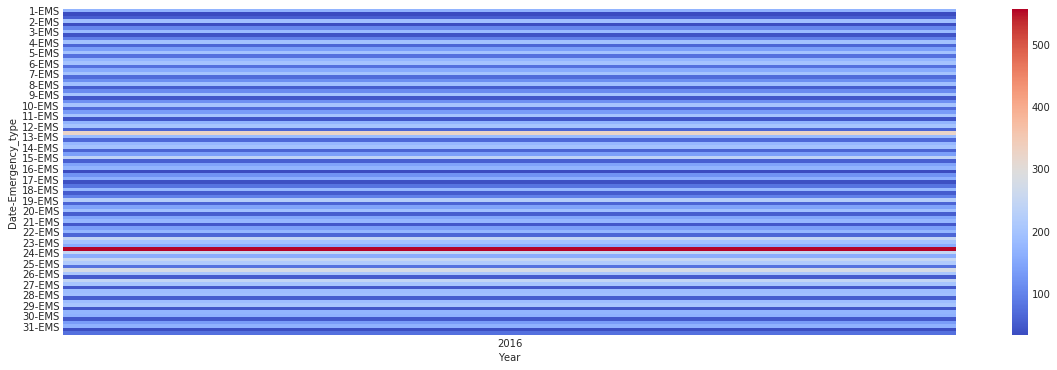

In [333]:
plt.figure(figsize=(20,6))
sns.heatmap(filtered_data_by_day.unstack(),cmap='coolwarm')

** That seems wierd why a lot of accidents only occured in 22,23 january and too different in whole month **

** Lets find it out why **

In [334]:
filtered_data_by_day = df[df['Month']==1].groupby(['Date','Emergency_type']).count()['twp']

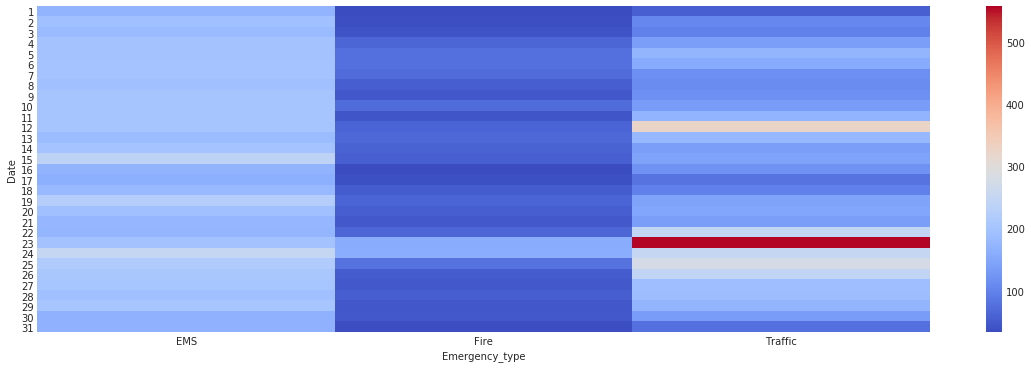

In [335]:
plt.figure(figsize=(20,6))
sns.heatmap(filtered_data_by_day.unstack(),cmap='coolwarm')

** Red strip only on traffic columns clearly means something occured on 22 23 jan **

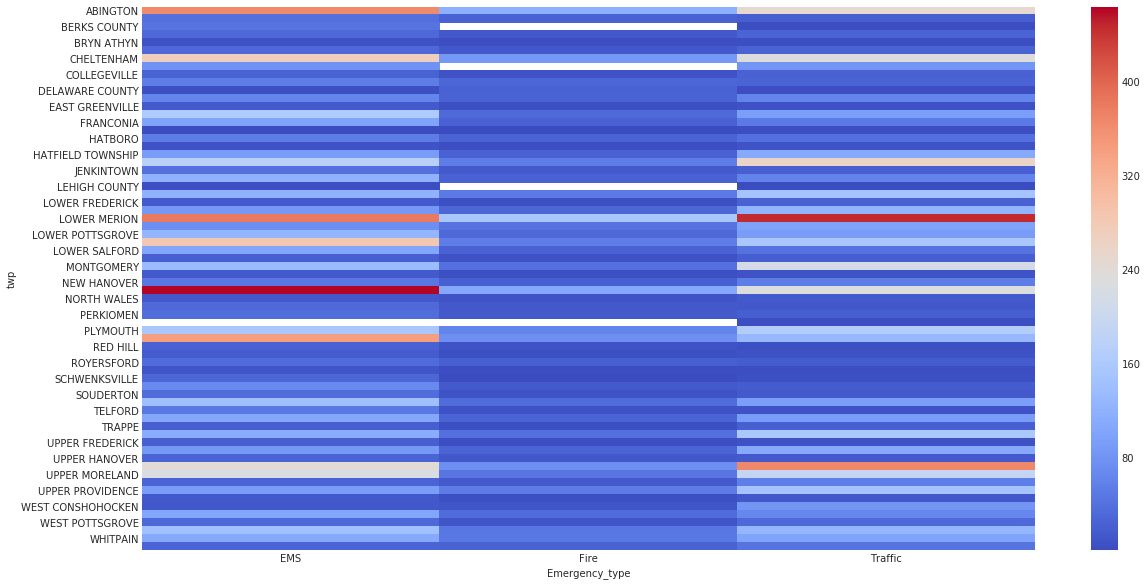

In [341]:
filtered_data_by_day = df[df['Month']==1].groupby(['twp','Emergency_type']).count()['Date']
plt.figure(figsize=(20,10))
sns.heatmap(filtered_data_by_day.unstack(),cmap='coolwarm')

** Now we can see that it was year 2016 january and town north Wales **

####  I searched the web I got answer It was Winter Strom near So traffic accidents occured 